In [1]:
import os
import torch
import cv2
import random
import glob
from matplotlib import pyplot as plt
from ultralytics import YOLO

# --- Проверка наличия и доступности CUDA ---
print("--- Проверка системы ---")
if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu_name = torch.cuda.get_device_name(0)
    print(f"✅ CUDA доступна. Будет использован GPU: {gpu_name}")
else:
    device = torch.device("cpu")
    print("⚠️ CUDA не найдена. Обучение будет происходить на CPU, что может быть очень долго.")
print("---------------------\n")

--- Проверка системы ---
✅ CUDA доступна. Будет использован GPU: NVIDIA GeForce RTX 3070 Ti
---------------------



In [2]:
import os
print(f"Всего процессорных потоков: {os.cpu_count()}")

Всего процессорных потоков: 8


In [ ]:
#Внутри этой папки должны быть директории train, val, test
DATASET_BASE_PATH = 'E:/Datasets/numberplate/numy'

# 2. Параметры обучения
EPOCHS = 100
BATCH_SIZE = 8 
IMAGE_SIZE = 640
MODEL_NAME = 'yolov8n_plate_detector_local'

✅ Проверка данных успешна. Пример: 8787.jpg


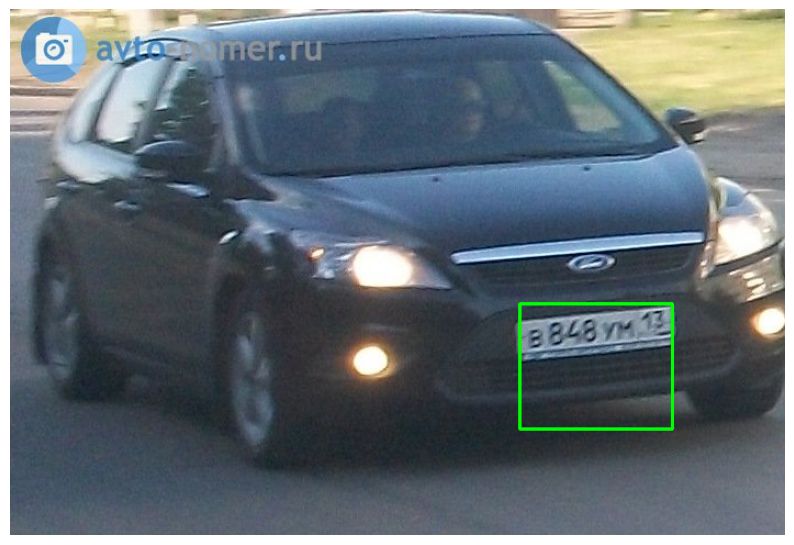

In [4]:
train_images_path = os.path.join(DATASET_BASE_PATH, 'train/images')
train_labels_path = os.path.join(DATASET_BASE_PATH, 'train/labels')

try:
    random_image_name = random.choice(os.listdir(train_images_path))
    image_path = os.path.join(train_images_path, random_image_name)
    label_path = os.path.join(train_labels_path, os.path.splitext(random_image_name)[0] + '.txt')

    image = cv2.imread(image_path)
    h, w, _ = image.shape

    with open(label_path, 'r') as f:
        line = f.readline().strip()
        _, x_center, y_center, width, height = map(float, line.split())
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((x_center + height / 2) * h)

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    print(f"✅ Проверка данных успешна. Пример: {random_image_name}")
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"❌ Ошибка: Не удалось найти данные по пути '{DATASET_BASE_PATH}'. Проверьте путь в Шаге 1.")
except Exception as e:
    print(f"❌ Произошла ошибка при проверке данных: {e}")

In [4]:
yaml_content = f"""
path: {os.path.abspath(DATASET_BASE_PATH)}
train: train/images
val: val/images
test: test/images

names:
  0: license_plate
"""

with open("dataset_config.yaml", "w") as f:
    f.write(yaml_content)

print("✅ Файл 'dataset_config.yaml' успешно создан.")

✅ Файл 'dataset_config.yaml' успешно создан.


In [6]:
model = YOLO('yolov8n.pt')

print("\n🚀 Начинаю обучение модели...")
results = model.train(
    data='dataset_config.yaml',
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    name=MODEL_NAME,
    device = 'gpu',
    workers=2
)
print("🏁 Обучение завершено!")


🚀 Начинаю обучение модели...
New https://pypi.org/project/ultralytics/8.3.218 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.217  Python-3.11.0 torch-2.9.0+cu130 CUDA:gpu (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_config.yaml, degrees=0.0, deterministic=True, device=gpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=

✅ Анализируем результаты из папки: runs/detect\yolov8n_plate_detector_local2

--- 🏆 Финальные метрики лучшей модели ---
Эпоха: 100
Точность (Precision): 0.9753
Полнота (Recall): 0.9729
mAP_0.5 (грубая точность): 0.9871
mAP_0.5-0.95 (строгая точность): 0.8485
------------------------------------------

--- 📊 Графики процесса обучения ---

Кривые ошибок (Loss Curves):


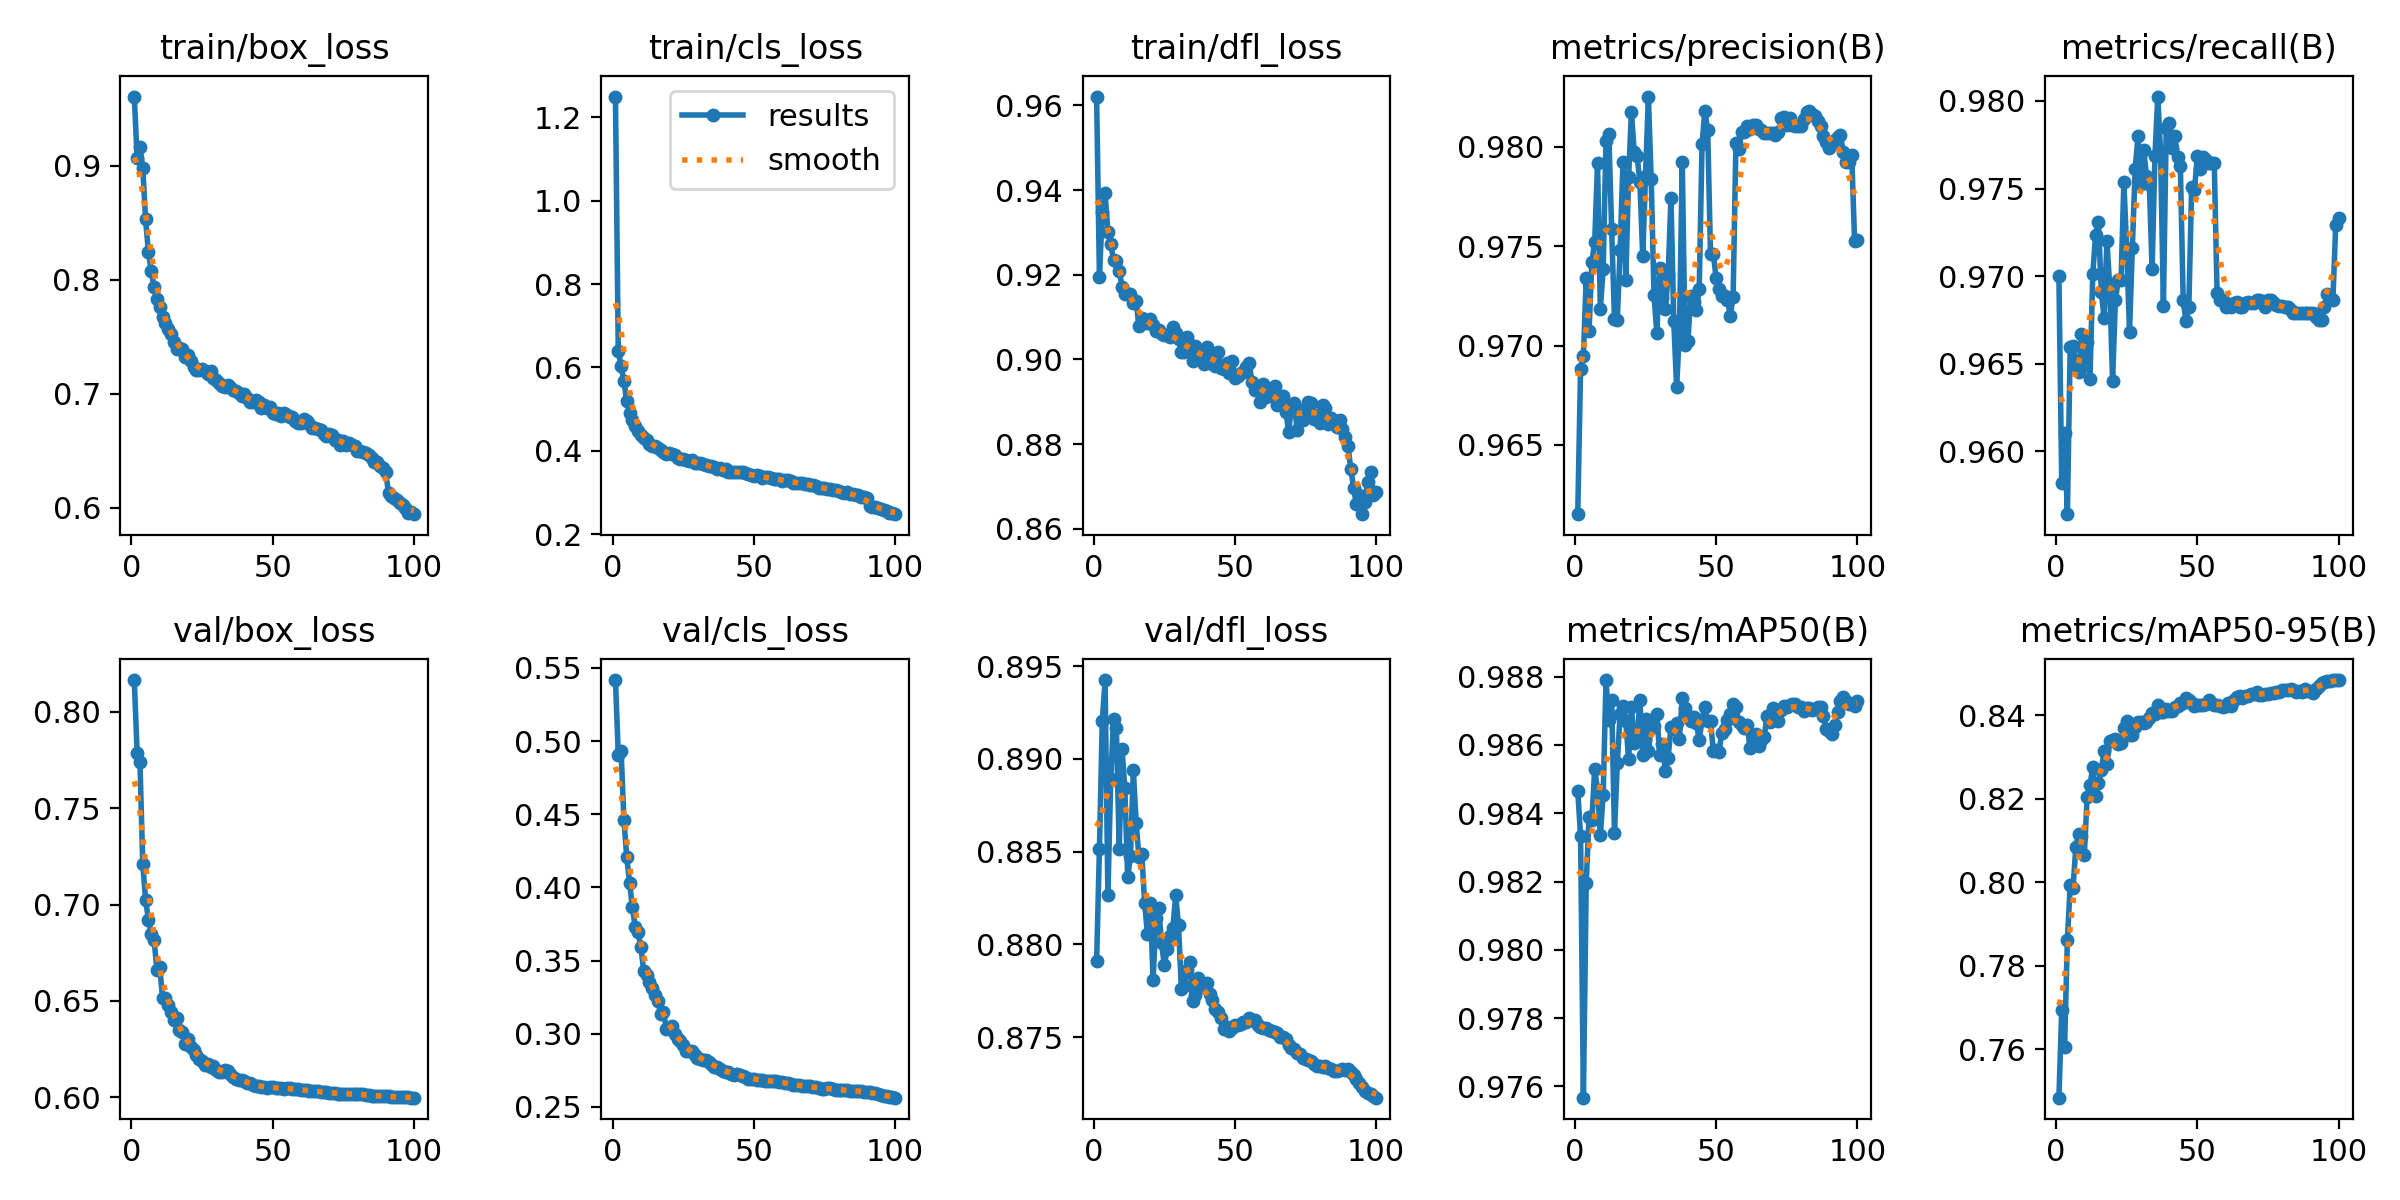


Матрица ошибок (Confusion Matrix):


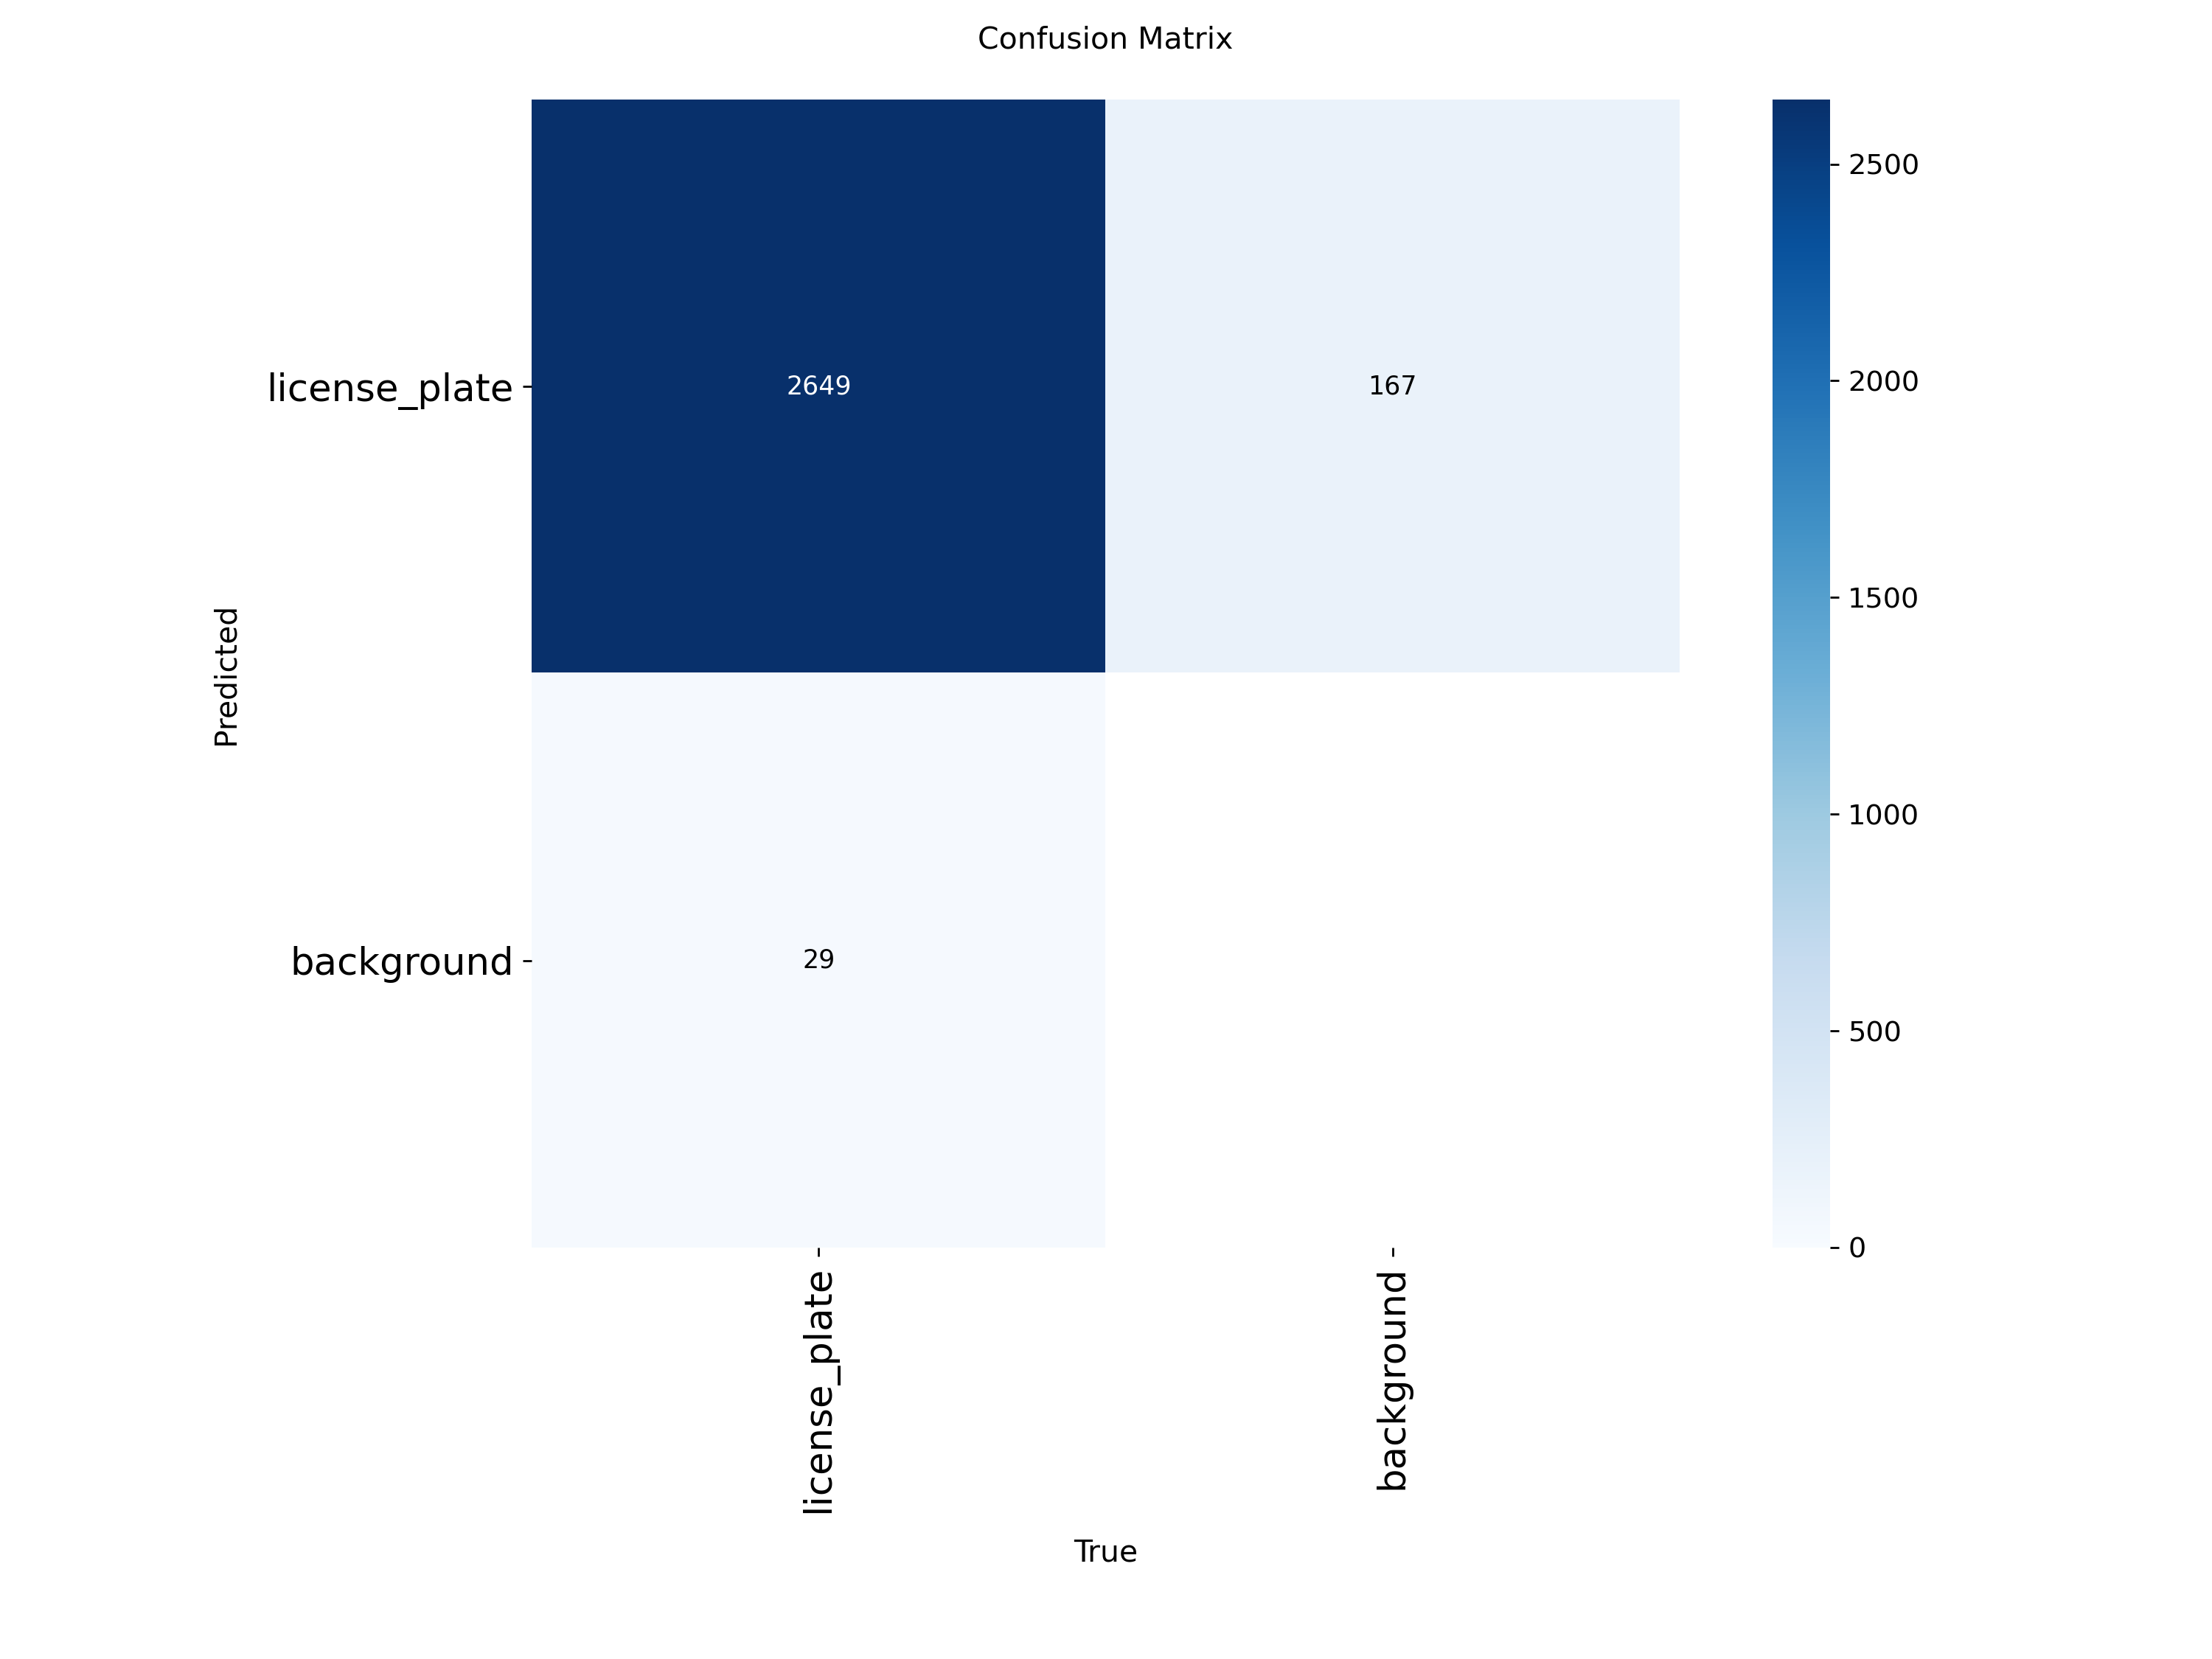


Графики P, R, mAP50, mAP50-95 (найден как BoxPR_curve.png):


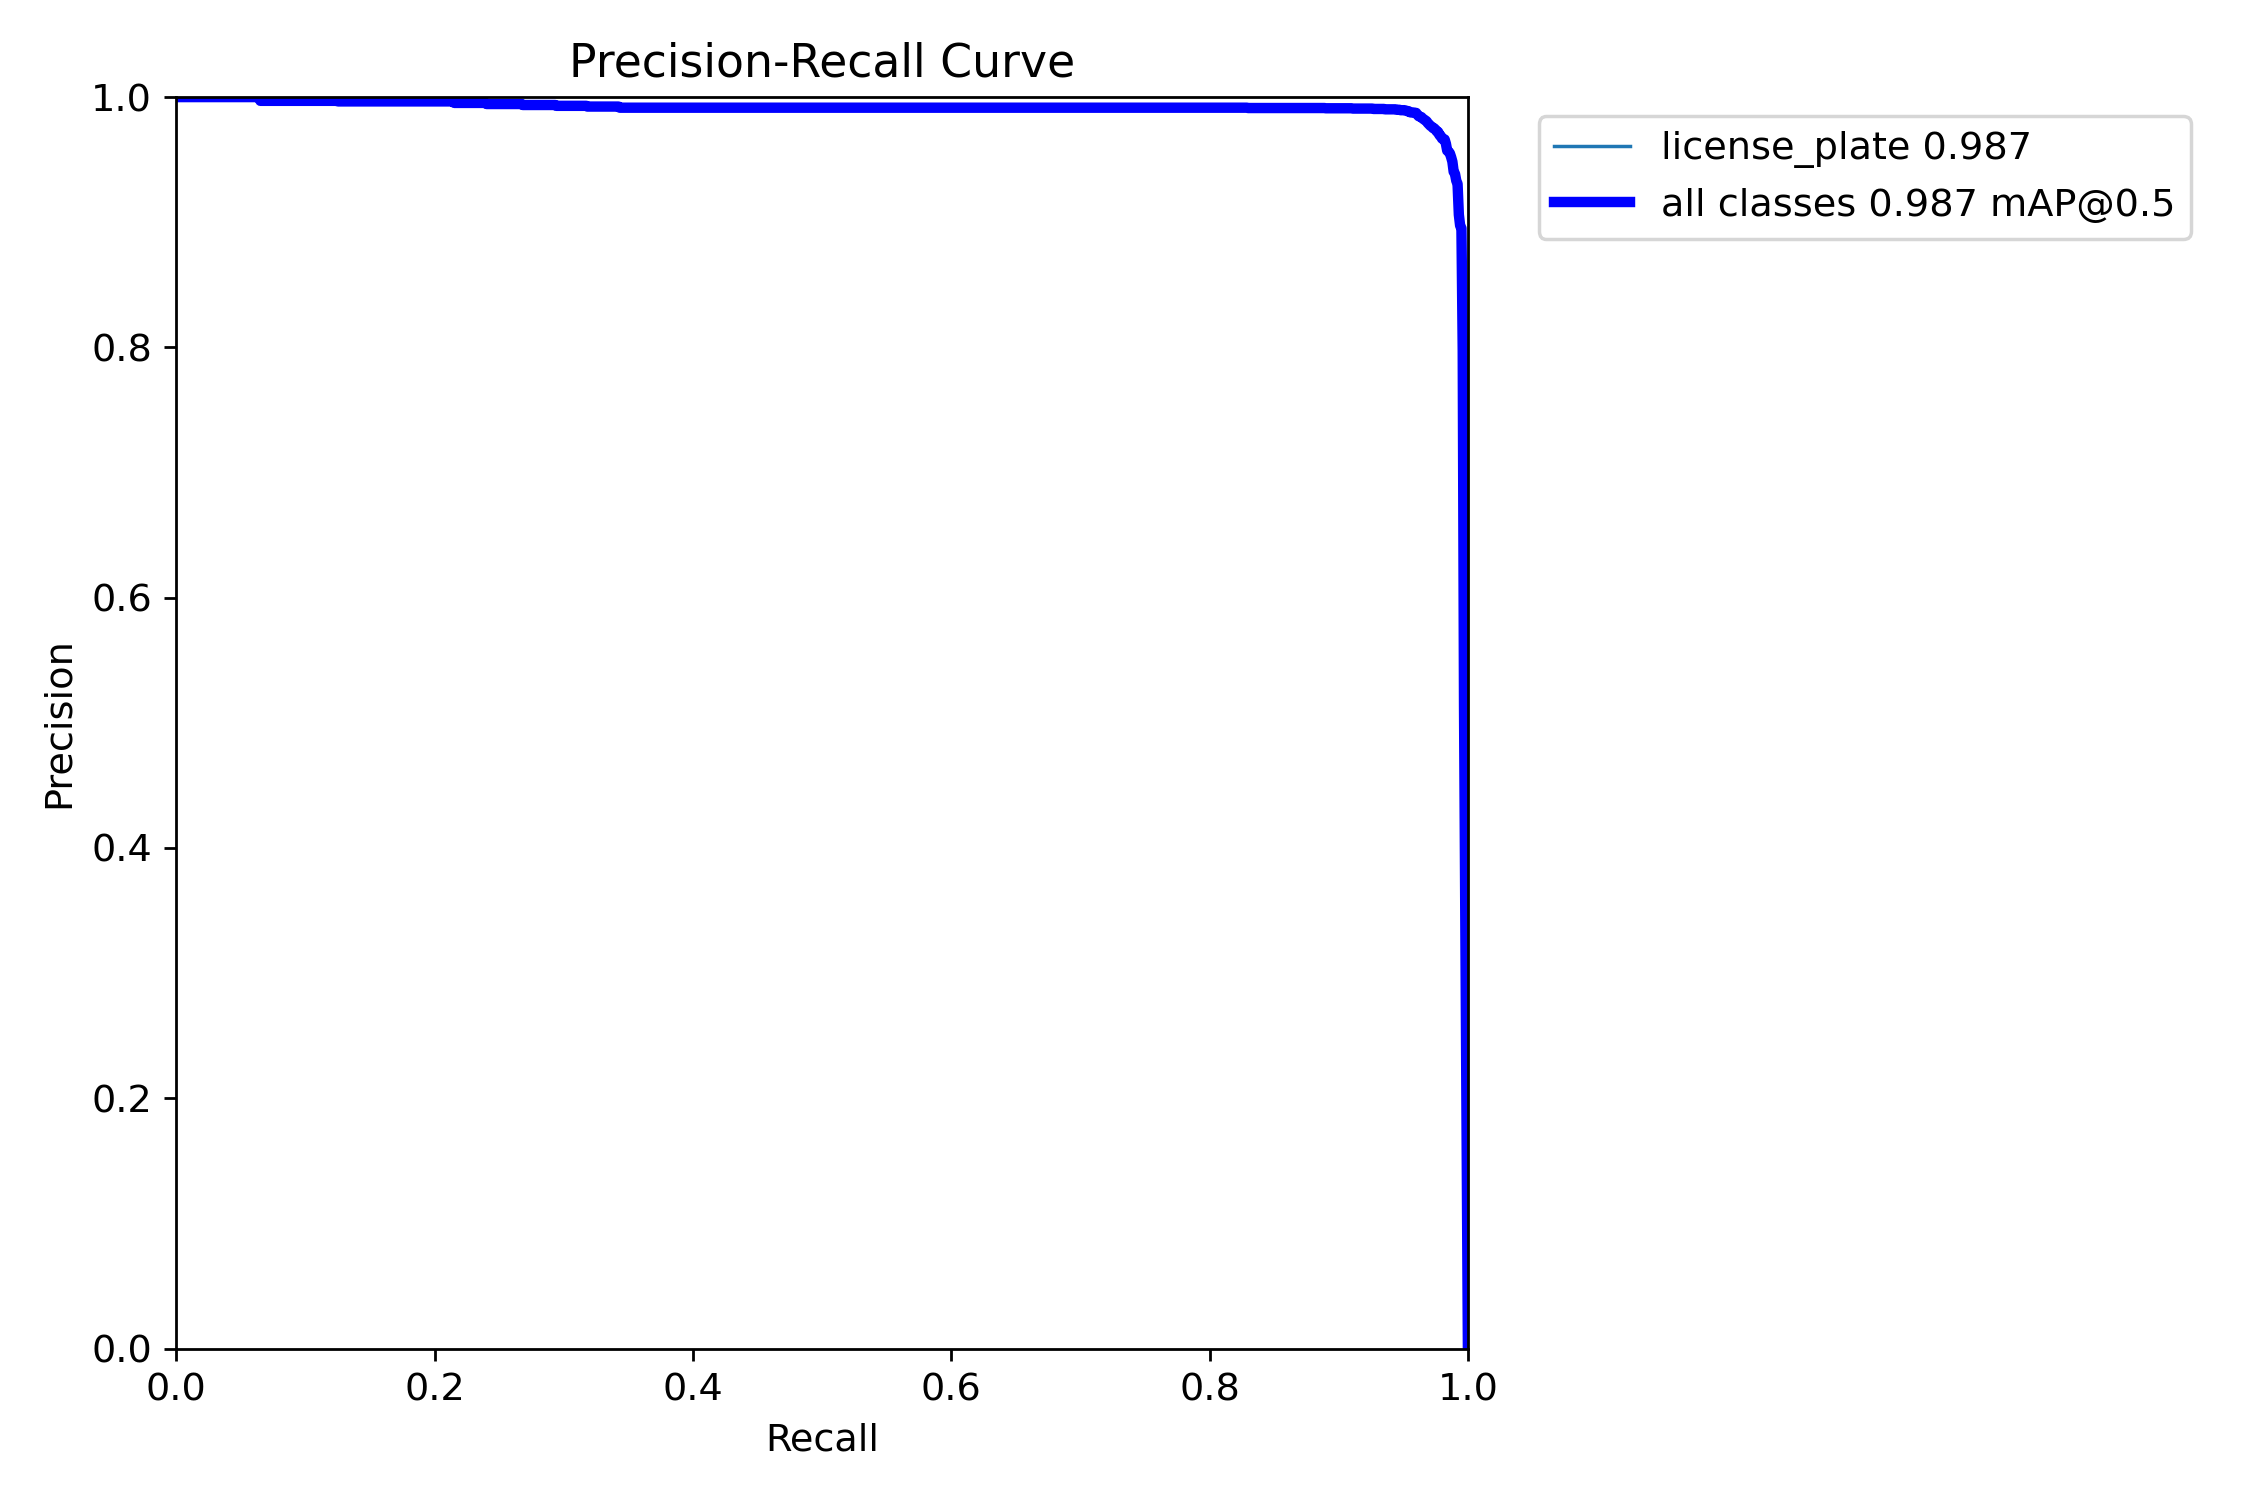


--- 🖼️ Примеры детекции на валидационной выборке ---


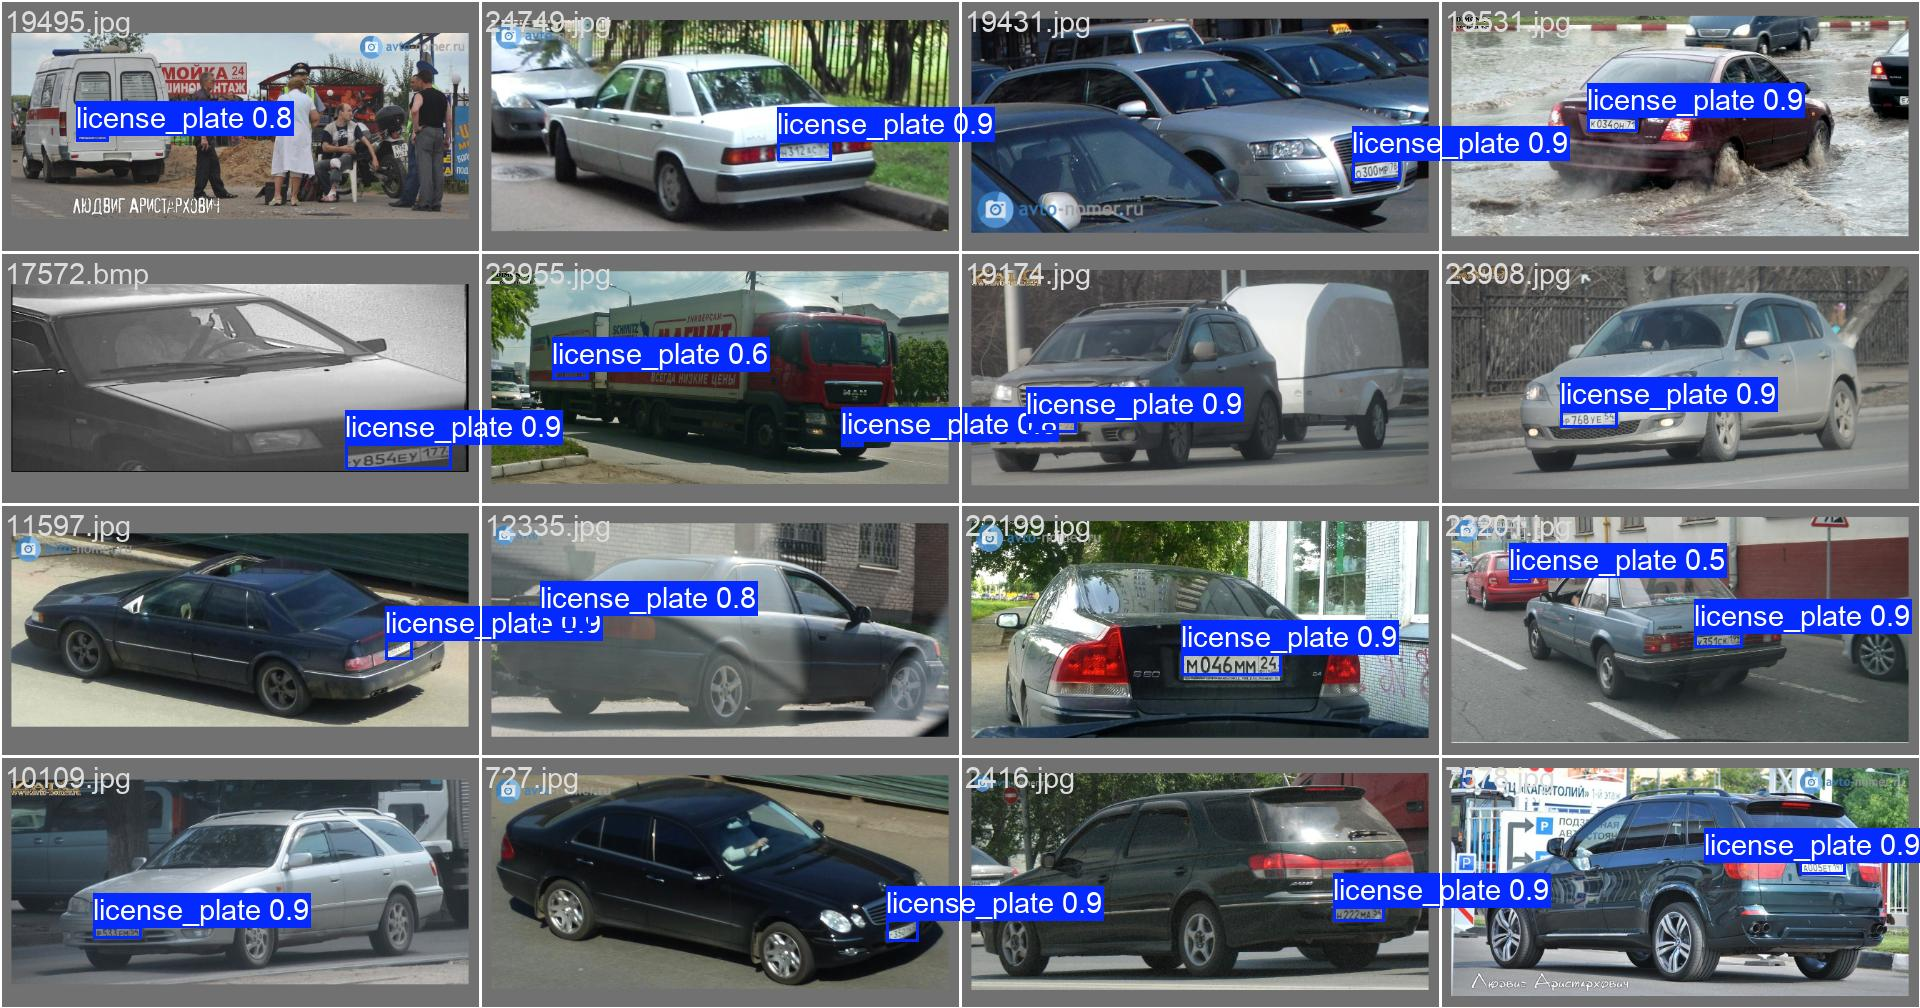

In [7]:
import os
import glob
import pandas as pd
from IPython.display import display, Image
import matplotlib.pyplot as plt


# должно совпадать с 'name' в .train()
model_name = 'yolov8n_plate_detector_local2' 
results_path = os.path.join('runs/detect', model_name)

# Проверяем, существует ли папка с результатами
if not os.path.exists(results_path):
    print(f"❌ Ошибка: Папка с результатами не найдена по пути '{results_path}'")
    print("Убедитесь, что переменная 'model_name' указана правильно.")
else:
    print(f"✅ Анализируем результаты из папки: {results_path}\n")

    
    # Загружаем CSV файл с результатами по каждой эпохе
    results_csv_path = os.path.join(results_path, 'results.csv')
    try:
        results_df = pd.read_csv(results_csv_path)
        
        # Очищаем лишние пробелы в названиях колонок
        results_df.columns = results_df.columns.str.strip()
        
        # Находим эпоху с лучшим показателем mAP50-95
        best_epoch = results_df['metrics/mAP50-95(B)'].idxmax()
        best_metrics = results_df.loc[best_epoch]

        print("--- 🏆 Финальные метрики лучшей модели ---")
        print(f"Эпоха: {int(best_metrics['epoch']) + 1}")
        print(f"Точность (Precision): {best_metrics['metrics/precision(B)']:.4f}")
        print(f"Полнота (Recall): {best_metrics['metrics/recall(B)']:.4f}")
        print(f"mAP_0.5 (грубая точность): {best_metrics['metrics/mAP50(B)']:.4f}")
        print(f"mAP_0.5-0.95 (строгая точность): {best_metrics['metrics/mAP50-95(B)']:.4f}")
        print("------------------------------------------\n")

    except FileNotFoundError:
        print("⚠️ Не удалось найти файл results.csv для вывода детальных метрик.")
    except Exception as e:
        print(f"⚠️ Произошла ошибка при чтении results.csv: {e}")

    # --- 3. Отображение ключевых графиков ---
    
    print("--- 📊 Графики процесса обучения ---")
    
    # Список графиков, которые мы хотим показать
    charts_to_display = {
        "Кривые ошибок (Loss Curves)": "results.png",
        "Матрица ошибок (Confusion Matrix)": "confusion_matrix.png",
        "Графики P, R, mAP50, mAP50-95": "PR_curve.png", # Иногда называется P_curve, R_curve и т.д.
    }
    
    found_charts = False
    for title, filename in charts_to_display.items():
        chart_path = os.path.join(results_path, filename)
        if os.path.exists(chart_path):
            print(f"\n{title}:")
            display(Image(filename=chart_path, width=800))
            found_charts = True
        else:
            # Попробуем найти похожие файлы, если стандартные имена не подошли
            alternative_search = glob.glob(os.path.join(results_path, f"*{filename.split('.')[0]}*"))
            if alternative_search:
                print(f"\n{title} (найден как {os.path.basename(alternative_search[0])}):")
                display(Image(filename=alternative_search[0], width=800))
                found_charts = True

    if not found_charts:
        print("\nНе удалось найти стандартные файлы с графиками. Проверьте содержимое папки с результатами.")
        
    # --- 4. Пример работы на валидационной выборке ---
    
    print("\n--- 🖼️ Примеры детекции на валидационной выборке ---")
    val_batch_files = glob.glob(os.path.join(results_path, 'val_batch*_pred.jpg'))
    if val_batch_files:
        # Показываем пример предсказаний на одном из батчей валидации
        display(Image(filename=sorted(val_batch_files)[0]))
    else:
        print("Не найдено изображений с примерами предсказаний на валидационной выборке.")

✅ Загружаю обученную модель из: runs/detect\yolov8n_plate_detector_local\weights/best.pt

--- 🧪 Запускаем проверку на 5 случайных тестовых изображениях ---

image 1/1 E:\Datasets\numberplate\numy\test\images\2520.jpg: 480x640 1 license_plate, 68.9ms
Speed: 2.5ms preprocess, 68.9ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


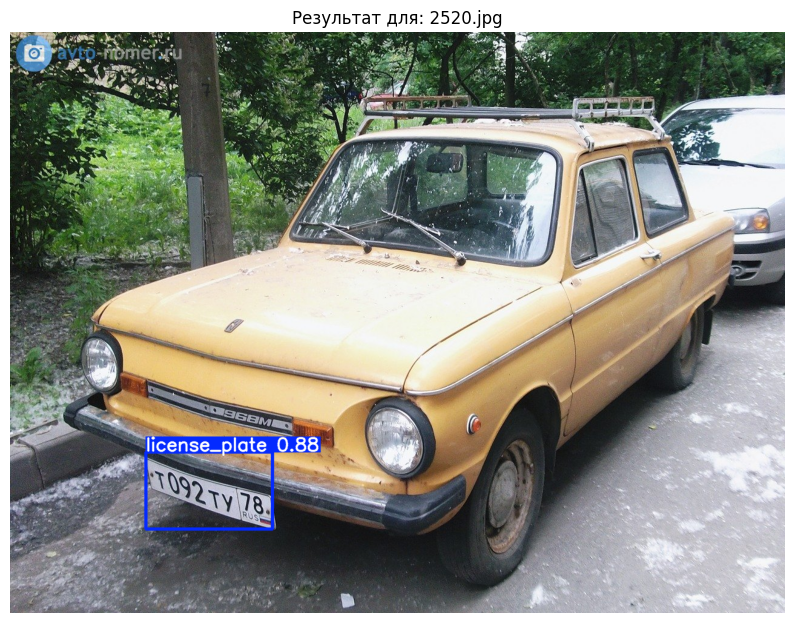


image 1/1 E:\Datasets\numberplate\numy\test\images\15443.jpg: 384x640 1 license_plate, 120.1ms
Speed: 4.7ms preprocess, 120.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


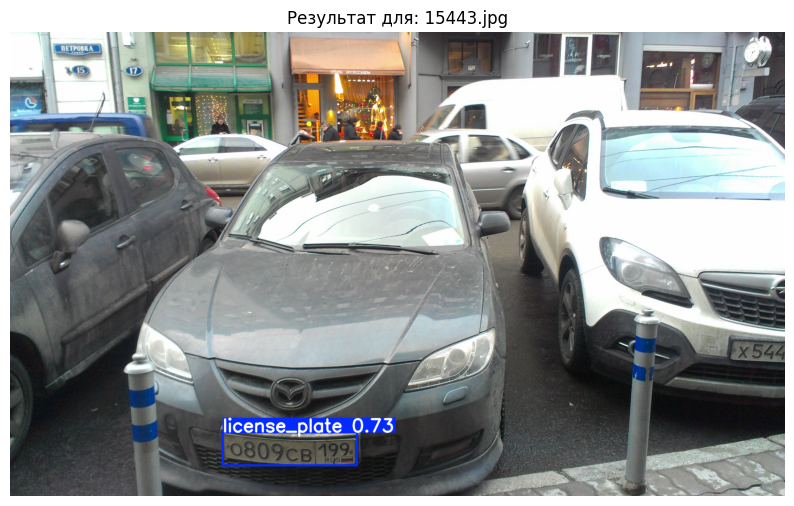


image 1/1 E:\Datasets\numberplate\numy\test\images\22914.jpg: 416x640 2 license_plates, 96.7ms
Speed: 2.1ms preprocess, 96.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


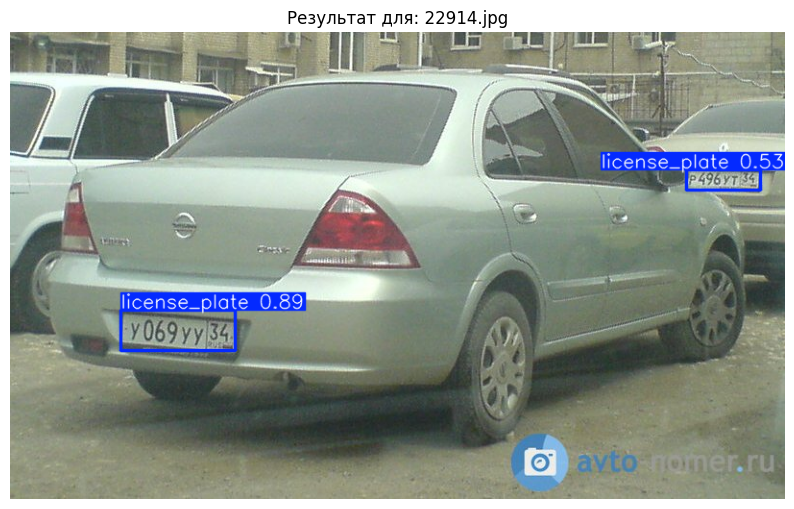


image 1/1 E:\Datasets\numberplate\numy\test\images\13516.jpg: 512x640 2 license_plates, 67.6ms
Speed: 3.1ms preprocess, 67.6ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


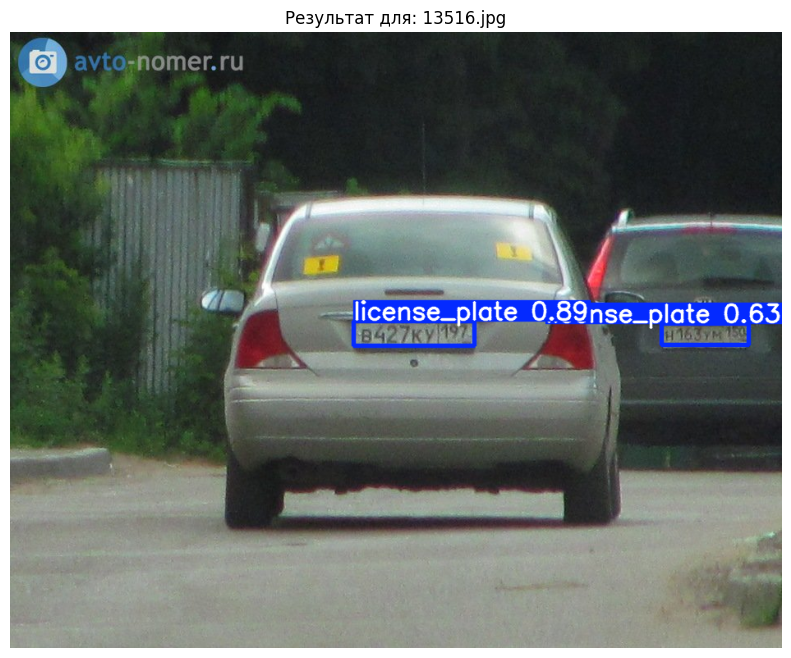


image 1/1 E:\Datasets\numberplate\numy\test\images\17147.jpg: 416x640 1 license_plate, 9.0ms
Speed: 2.3ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


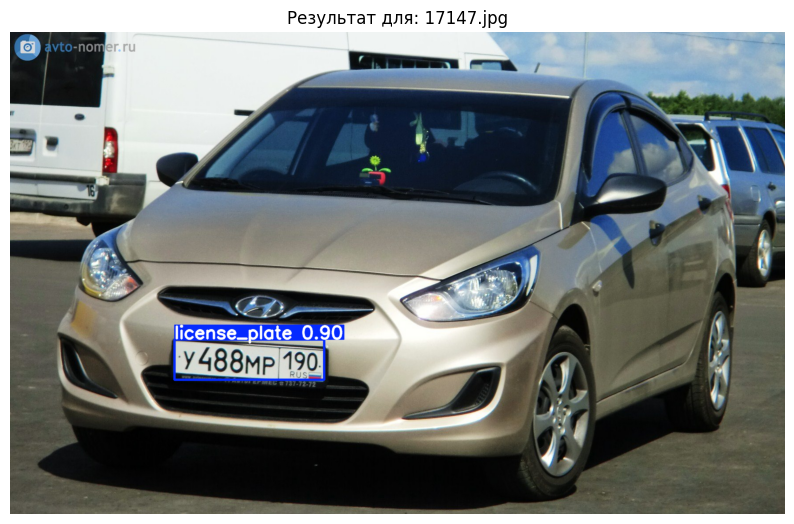

--- ✅ Проверка завершена ---


In [8]:
# Путь к весам нашей лучшей модели
weights_path = os.path.join('runs/detect', MODEL_NAME, 'weights/best.pt')

# Проверяем, существует ли файл с весами
if not os.path.exists(weights_path):
    print(f"❌ Ошибка: Файл с весами не найден по пути {weights_path}")
else:
    print(f"✅ Загружаю обученную модель из: {weights_path}")
    model = YOLO(weights_path)

    # Путь к тестовым изображениям
    test_images_path = os.path.join(DATASET_BASE_PATH, 'test/images/')
    image_files = glob.glob(os.path.join(test_images_path, '*.jpg'))
    
    # Выбираем 5 случайных изображений для демонстрации
    if len(image_files) > 5:
        random_images = random.sample(image_files, k=5)
    else:
        random_images = image_files

    print(f"\n--- 🧪 Запускаем проверку на {len(random_images)} случайных тестовых изображениях ---")
    for img_path in random_images:
        # Запускаем предсказание с порогом уверенности 0.5
        preds = model.predict(img_path, conf=0.5) 
        
        # Метод .plot() сам нарисует рамки
        annotated_frame = preds[0].plot()

        # Отображаем результат
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
        plt.title(f'Результат для: {os.path.basename(img_path)}')
        plt.axis('off')
        plt.show()
    print("--- ✅ Проверка завершена ---")